In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [25]:
df = pd.read_csv('test_data.csv')
df = df.dropna()
df = df.sort_values('id')

In [26]:
df.head()

,id,patientid,blockno,coordx,coordy,coordt,realpointid,realpointx,realpointy,fakepointid,fakepointx,fakepointy,speed,pausevalue,correctangle,wrongangle,err,errorcorrected
5928,12032,-1,4,0,0,0,hello,0.000000,0.000000,hello,0.0000,0.000000,0.000000,0,0.000000,0.000000,0,0
5947,12033,0,1,229,823,1,checkpointA,236.025009,126.706253,checkpoint2Fake,25.5875,198.237503,0.000000,0,0.000000,0.000000,0,0
5948,12034,0,1,232,814,621,checkpointA,236.025009,126.706253,checkpoint2Fake,25.5875,198.237503,0.015301,620,14.336574,34.048026,0,0
5949,12035,0,1,233,810,632,checkpointA,236.025009,126.706253,checkpoint2Fake,25.5875,198.237503,0.374828,11,10.145323,30.157111,0,0
5950,12036,0,1,234,805,643,checkpointA,236.025009,126.706253,checkpoint2Fake,25.5875,198.237503,0.463547,11,7.483554,27.630004,0,0


In [27]:
participantID = df['patientid'].unique()
print(participantID)

[-1  0  1]


In [38]:
def visualize(xaxis, yaxis, title, x_label, y_label):
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.scatter(xaxis, yaxis)
  plt.show()

In [33]:
mean_df = pd.DataFrame(columns=['pid','blockno','numpause', 'maxpause','minpause', 'avgpause','error_rate','numerrorcorr', 'maxspeed', 'minspeed', 'avgspeed','moca'])
for i in participantID:
  if i == -1:
    continue
  else:
    pid_df = df.loc[df['patientid'] == i]
    blockno = pid_df['blockno'].unique()
    for j in blockno:
      block_df = pid_df.loc[pid_df['blockno'] == j]

      num_pauses = block_df[block_df.pausevalue >= 100].shape[0]
      maxpause = block_df[block_df.pausevalue >= 100]['pausevalue'].max()
      minpause = block_df[block_df.pausevalue >= 100]['pausevalue'].min()
      avgpause = block_df[block_df.pausevalue >= 100].loc[:, 'pausevalue'].mean()

      num_error = block_df[block_df.err == 1].shape[0]
      error_rate = num_error / block_df.shape[0]
      num_errorcorr = block_df[block_df.errorcorrected == 1].shape[0]

      maxspeed = block_df['speed'].max()
      minspeed = block_df[block_df.speed > 0]['speed'].min()
      avgspeed = block_df.loc[:, 'speed'].mean()

      moca = np.random.randint(26, 31)
      #df['moca'] = np.random.randint(26, 31, df.shape[0])

      mean_measures = [i, j, num_pauses, maxpause, minpause, avgpause, error_rate, num_errorcorr, maxspeed, minspeed, avgspeed, moca]

      mean_df.loc[len(mean_df)] = mean_measures

In [34]:
print(mean_df)

   pid  blockno  numpause  maxpause  minpause  avgpause  error_rate  \
0  0.0      1.0       4.0     620.0     199.0   329.000    0.142857   
1  0.0      2.0       4.0     417.0     137.0   252.500    0.196622   
2  0.0      3.0       8.0     502.0     116.0   336.875    0.499523   
3  0.0      4.0       2.0     483.0     275.0   379.000    0.181287   
4  1.0      1.0       2.0     579.0     395.0   487.000    0.169072   
5  1.0      2.0       4.0     643.0     116.0   361.000    0.319038   
6  1.0      3.0       7.0     630.0     111.0   251.000    0.228130   
7  1.0      4.0       7.0     476.0     101.0   198.000    0.362565   

   numerrorcorr  maxspeed  minspeed  avgspeed  moca  
0          28.0  3.334022  0.003472  0.512843  28.0  
1          46.0  2.015564  0.003165  0.437793  26.0  
2          57.0  3.439204  0.002242  0.469803  29.0  
3          37.0  4.002550  0.003636  0.492421  27.0  
4          18.0  2.088061  0.002532  0.464810  30.0  
5          31.0  2.215006  0.001555 

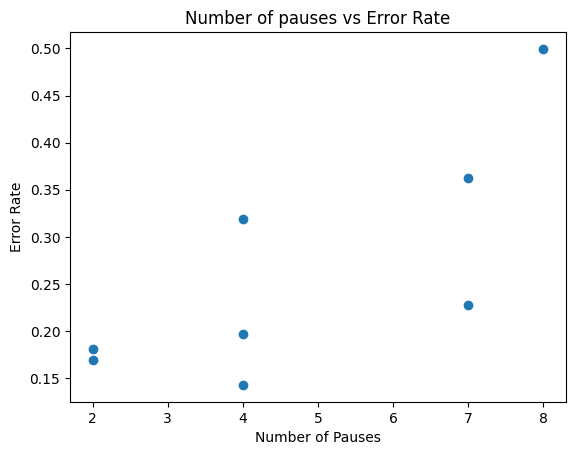

In [40]:
visualize(mean_df['numpause'], mean_df['error_rate'], "Number of pauses vs Error Rate", "Number of Pauses", "Error Rate")

In [42]:
def perform_chi_square_test(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpreting the result
    significant = p < 0.05  # 5% significance level
    return chi2, p, significant

In [49]:
def perform_spearman_correlation(data, col1, col2):
    # Calculating Spearman Correlation
    correlation, p_value = spearmanr(data[col1], data[col2])

    # Interpreting the result
    significant = p_value < 0.05  # 5% significance level
    return correlation, p_value, significant

In [50]:
mean_columns=['pid','blockno','numpause', 'maxpause','minpause', 'avgpause','error_rate','numerrorcorr', 'maxspeed', 'minspeed', 'avgspeed','moca']
for i in range(0, len(mean_columns)-1):
  for j in range(i+1, len(mean_columns)):
    '''
    chi = perform_chi_square_test(mean_df, mean_columns[i], mean_columns[j])
    if(not chi[2]):
      print("columns: ", mean_columns[i], " and ", mean_columns[j])
      print("chi2 value: ", chi[0])
      print("p value: ", chi[1])
      print("Correlation: ", chi[2])
      print()
    '''

    spear = perform_spearman_correlation(mean_df, mean_columns[i], mean_columns[j])
    if(spear[2]):
      print("columns: ", mean_columns[i], " and ", mean_columns[j])
      print("correlation value: ", spear[0])
      print("p value: ", spear[1])
      print("significance: ", spear[2])
      print()

columns:  numpause  and  minpause
correlation value:  -0.8451281451421797
p value:  0.008241351127693301
significance:  True

columns:  numpause  and  error_rate
correlation value:  0.7783117824941563
p value:  0.02290964777883793
significance:  True

columns:  minpause  and  avgpause
correlation value:  0.8024095954818835
p value:  0.016540722800677185
significance:  True

columns:  minpause  and  error_rate
correlation value:  -0.790433332862751
p value:  0.019544537274857787
significance:  True

